In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Discharge_Funnel.xlsx", sheet_name = 'Claim_data')
data_1 = pd.read_excel("Discharge_Funnel.xlsx", sheet_name = 'Raw_Data')

In [3]:
data_1.head(2)

,create_time,claim_id,patient_name,hospital_code,hospital_name,policy_number,member_no,preauth_id,procedure_name,admission_date,discharge_date,procedure_id,is_package,name,amountMatchPercentage,vitraya_result,medical_status,inscope,tariff_applied
0,2024-06-24 21:47:19,1005422,Mr.PULAGAM REDDY,98778,"Yashoda Hospital,Khanamet,Hyderabad",3.397017e+13,24041012.0,911503,PHACO WITH UNIFOCAL / UNFOLDABLE LENS\n- I (PKG),2024-06-24 12:32:00,2024-06-24 12:32:00,4,1,Cataract,100.0,MANUAL,NaN,0,1
1,2024-06-24 21:38:46,1005451,Mrs.Shrutika Srivastava,20007,"Max Super Speciality Hospital, Vaishali",3.295156e+13,23021013.0,911540,NaN,2024-06-24 01:12:00,2024-06-24 01:12:00,0,0,NaN,100.0,MANUAL,NaN,0,1


In [7]:
#data.head()

In [8]:
#pwd

In [4]:
Total_Discharge = data.claim_id.nunique()
Discharge_Enable_Hospital = data_1.claim_id.nunique()
Bill_Parsed_95_100 = data_1[(data_1['amountMatchPercentage'] >= 95) & (data_1['amountMatchPercentage'] < 100)].amountMatchPercentage.count()
Bill_Parsed_100 = data_1[data_1['amountMatchPercentage']==100].amountMatchPercentage.count()
Bill_Failed = Discharge_Enable_Hospital - (Bill_Parsed_95_100 + Bill_Parsed_100)
Bill_Parsed_Succesfully = Discharge_Enable_Hospital - Bill_Failed
Terrif_Applied = data_1[data_1['tariff_applied']==1].tariff_applied.count()
Terrif_Failed_Claims = data_1[(data_1['tariff_applied'] == 0) & (data_1['amountMatchPercentage'] >= 95)]
Terrif_Failed = Terrif_Failed_Claims.tariff_applied.count()

In [5]:
dict_1 = {'Total_Discharge': Total_Discharge, 'Discharge_Enable_Hospital':Discharge_Enable_Hospital, 'Bill_Parsed_95_100':Bill_Parsed_95_100,
          'Bill_Parsed_100':Bill_Parsed_100, 'Bill_Failed': Bill_Failed, 'Bill_Parsed_Succesfully': Bill_Parsed_Succesfully, 'Terrif_Applied': Terrif_Applied,
        'Terrif_Failed': Terrif_Failed}

In [6]:
dt = pd.DataFrame(list(dict_1.items()), columns=['Summary', 'Figure'])
dt.head(10)
df = dt

In [7]:
dt

,Summary,Figure
0,Total_Discharge,374
1,Discharge_Enable_Hospital,287
2,Bill_Parsed_95_100,40
3,Bill_Parsed_100,202
4,Bill_Failed,45
5,Bill_Parsed_Succesfully,242
6,Terrif_Applied,237
7,Terrif_Failed,5


In [8]:
dt['Percentage'] = None 

In [9]:
dt

,Summary,Figure,Percentage
0,Total_Discharge,374,None
1,Discharge_Enable_Hospital,287,None
2,Bill_Parsed_95_100,40,None
3,Bill_Parsed_100,202,None
4,Bill_Failed,45,None
5,Bill_Parsed_Succesfully,242,None
6,Terrif_Applied,237,None
7,Terrif_Failed,5,None


In [91]:
(df['Figure'].iloc[4]/df['Figure'].iloc[1])*100

15.6794425087108

In [10]:
df.loc[df['Summary'] == 'Bill_Failed'] = ((df['Figure'].iloc[4]/df['Figure'].iloc[1])*100)

C:\Users\Vitraya1\AppData\Local\Temp\ipykernel_27684\316229594.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.6794425087108' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Summary'] == 'Bill_Failed'] = ((df['Figure'].iloc[4]/df['Figure'].iloc[1])*100)


In [11]:
df

,Summary,Figure,Percentage
0,Total_Discharge,374.000000,None
1,Discharge_Enable_Hospital,287.000000,None
2,Bill_Parsed_95_100,40.000000,None
3,Bill_Parsed_100,202.000000,None
4,15.679443,15.679443,15.679443
5,Bill_Parsed_Succesfully,242.000000,None
6,Terrif_Applied,237.000000,None
7,Terrif_Failed,5.000000,None


In [62]:
Terrif_Failed_Claims  = Terrif_Failed_Claims[['claim_id', 'hospital_code', 'hospital_name' ]]

In [63]:
Terrif_Failed_Claims

,claim_id,hospital_code,hospital_name
3,1001055,20418,"NIRMAN HOSPITAL ,SURAT ,GUJRAT"
152,1005361,20294,"Manipal Hospital Yeshwanthpur, Bengaluru"
177,1003626,20362,Kailash Hospital and Heart Institute
178,1005409,20294,"Manipal Hospital Yeshwanthpur, Bengaluru"
197,1005720,20294,"Manipal Hospital Yeshwanthpur, Bengaluru"


### plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.barplot(x='Values', y='Variables', data=df, palette='viridis')
plt.xlabel('Values')  # Set x-axis label
plt.ylabel('Variables')  # Set y-axis label
plt.title('Bar Plot of Values by Category')  # Set plot title
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

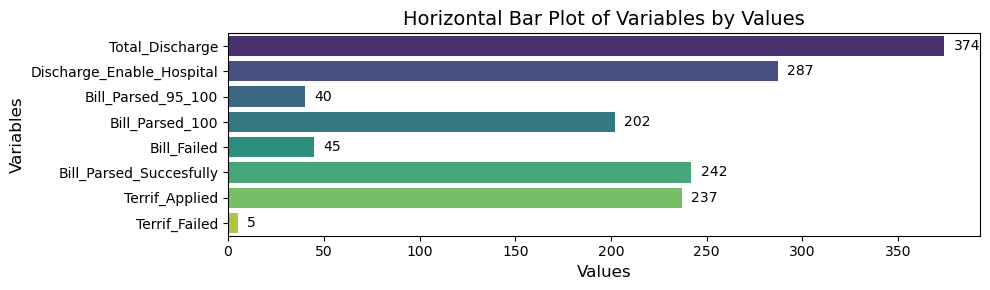

In [68]:

# Plotting using Seaborn (horizontal bar plot)
plt.figure(figsize=(10, 3))  # Adjust the figure size if needed
bars = sns.barplot(x='Figure', y='Summary', data=df, palette='viridis')

# Add value annotations to each bar
for bar in bars.patches:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', fontsize=10, color='black')

plt.xlabel('Values', fontsize=12)  # Set x-axis label
plt.ylabel('Variables', fontsize=12)  # Set y-axis label
plt.title('Horizontal Bar Plot of Variables by Values', fontsize=14)  # Set plot title
plt.tight_layout()  # Ensure labels are not cut off
plt.show()